In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd '/content/drive/MyDrive/Bilingual-Sentiment-Analysis/'

/content/drive/MyDrive/Bilingual-Sentiment-Analysis


In [3]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.corpus import stopwords 
import re,string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
!pip install pyspellchecker
from spellchecker import SpellChecker
!pip install emoji
!pip install googletrans==4.0.0-rc1

import emoji
import pandas as pd
!pip install googletrans
from googletrans import Translator
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from nltk.corpus import wordnet
from sklearn.metrics import classification_report
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#google translate
translator = Translator(service_urls =['translate.google.com'])

#pyspellchecker
spell = SpellChecker()


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


  Using cached httpx-0.13.3-py3-none-any.whl (55 kB)
  Using cached httpcore-0.9.1-py3-none-any.whl (42 kB)
  Using cached h11-0.9.0-py2.py3-none-any.whl (53 kB)
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17416 sha256=2987f8163dd8ec51f664ae9e9e9552dff15da691fa4bdf02dd1dd809ad4d148f
  Stored in directory: /root/.cache/pip/wheels/43/34/00/4fe71786ea6d12314b29037620c36d857e5d104ac2748bf82a
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.12.0
    Uninstalling h11-0.12.0:
      Successfully uninstalled h11-0.12.0
  Attempting uninstall: httpcore
    Found existing installation: httpcore 0.14.7
    Uninstalling httpcore-0.14.7:
      Successfully uninstalled httpcore-0.14.7
  Attempting uninstall: httpx
    Found existing installation: httpx 0.22.0
    Uninstalling httpx-0.22.0:
      Successfully uninstalled httpx-0.22.0
  Attempting uninstall: googletrans
    Found existing installation: googletrans

In [4]:
#label 0 means negative and 4 means positive
data = pd.read_csv("test_data.csv",skip_blank_lines=True,encoding = "latin") 
data

,ï»¿Label,number,date,no_query,name,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
39996,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
39997,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
39998,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
39999,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?


In [5]:
l=[]
for i in data["ï»¿Label"]:
    if(i==0):
        l.append("negative")
    else:
        l.append("positive")
data['label']=l

In [6]:
#dropping unwanted columns



data=data.drop(columns=['number', 'date','name','no_query','ï»¿Label'])

In [7]:
data

,Tweet,label
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative
1,is upset that he can't update his Facebook by ...,negative
2,@Kenichan I dived many times for the ball. Man...,negative
3,my whole body feels itchy and like its on fire,negative
4,"@nationwideclass no, it's not behaving at all....",negative
...,...,...
39996,My GrandMa is making Dinenr with my Mum,positive
39997,Mid-morning snack time... A bowl of cheese noo...,positive
39998,@ShaDeLa same here say it like from the Termi...,positive
39999,@DestinyHope92 im great thaanks wbuu?,positive


In [8]:
#removes all emojis
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [9]:
def contractions():
    
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "ily":"I love you",
        "Ily":"I love you",
        "Ihy":"I hate you",
        "ihy":"I hate you",
        "imy":"I miss you",
        "Imy":"I miss you",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "im":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks",
        "shit":"bad",
        "tmr":"tomorrow",
        "tmrw":"tomorrow",
        "u":"you",
        "ur":"your",
        "k":"okay",
        "ok":"okay",
        "da":"the",
        "tom":"tomorrow",
        "Tom":"tomorrow",
        "v'll":"we will",
        "wassup":"what is up with you",
        "waddup":"what is up with you",
        "yo":"greet",
        "hey":"greet",
        "lol":"laugh",
        "lmao":"laugh",
        "Lmao":"laugh",
        "rofl":"laugh",
        "y":"why",
        "wut":"what",
        "wat":"what",
        "stfu":"angry",
        "wtf":"angry",
        "ya":"yes",
        "yeah":"yes",
        "ummmm":"confused",
        "ummm":"confused",
        "umm":"confused",
        "hmmm":"confused",
        "i'm":"I am",
        "awww":"amazement",
        "Awww":"amazement",
        "aww":"amazement",
        "Aww":"amazement",
        "can't":"cannot",
        "Can't":"cannot",
        "CAN'T":"cannot",
        "awe":"amazement",
        "Awe":"amazement",
        "ugh":"sad",
        "ughh":"sad",
        "Ugh":"sad",
        "Ughh":"sad",
        "UGHH":"sad",
        "ughhhh":"sad",
        "ughhh":"sad"
        }



In [10]:
def emoticons():
    
    return {
        ":)":"smiley",
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":((((":"sad",
        ":(((":"sad",
        ":((":"sad",
        ":(":"sad",
        ":/":"sad",
        ":///":"sad",
        ":////":"sad",
        "://///":"sad",
        "://":"sad",
        ":///////":"sad",
        ":////":"sad",
        "-_-":"angry",
        ":|":"normal",
        ";)":"playful",
        ";D":"playful",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }




In [11]:
def removal_of_noise(sent):
    clean_sent=[]
    temp_st=""
    list_sent=sent.split(" ")
    c=0
    d=contractions()
    emoji=emoticons()
    for word in list_sent:
        #removal of url
        word = re.sub(r"http\S+", "", word)
        word = re.sub(r"[www.][a-zA-Z0-9_]+[.com]", "", word)
        #removal of account handles '@'
        word = re.sub("(@[A-Za-z0-9_]+)","", word) 
        
        #replacing emoticons with their respective words
        if(word in emoji.keys()):
            word=emoji[word]
        #replacing short form words with their full form
        if(word.lower() in d.keys()):
            word=d[word.lower()]
        if(c==0):
            temp_st=word
        else:
            temp_st=temp_st+" "+word
        c=c+1
    sent=temp_st
    stop_words = set(stopwords.words('english'))
    stop_words.add('is')
    stop_words.remove('not')
    for word in word_tokenize(sent):
        if(word.lower() not in stop_words and word.lower() not in string.punctuation and word!="'" and word!='"' ):
            #print(word)
            word=spell.correction(word.lower())
            word=re.sub("[0-9]+","",word)
            word=re.sub("[.]+"," ",word)
            word=re.sub("[-]+"," ",word)
            word=re.sub("[_]+"," ",word)
            word = re.sub("~"," ", word) 
            if(len(word)!=1):
                clean_sent.append(word.lower())
    cleaned_st=""
    for i in clean_sent:
        cleaned_st=cleaned_st+" "+i
    #print(cleaned_st)
    return lemmatization(cleaned_st)




In [12]:
def lemmatization(sent):
    lemmatize=WordNetLemmatizer()
    sentence_after_lemmatization=[]
    for word,tag in pos_tag(word_tokenize(sent)):
        if(tag[0:2]=="NN"):
            pos='n'
        elif(tag[0:2]=="VB"):
            pos='v'
        else:
            pos='a'
        lem=lemmatize.lemmatize(word,pos)
        sentence_after_lemmatization.append(lem)
    st=""
    for i in sentence_after_lemmatization:
        if(i!="be" and i!="is" and len(i)!=1):
            st=st+" "+i
    #print("lemi",st)
    c=0
    list_text=st.split()
    flag=0
    new_st=""
    for i in list_text:
        temp=i
        if(flag==1):
            flag=0
            continue
        if(i=="not" and (c+1)<len(list_text)):
            for syn in wordnet.synsets(list_text[c+1]):
                antonyms=[]
                for l in syn.lemmas():
                    #print(l)
                    if l.antonyms():
                        antonyms.append(l.antonyms()[0].name())
                        #print(antonyms)
                        temp=antonyms[0]
                        flag=1
                        break
                if(flag==1):
                    break
        new_st=new_st+" "+temp
        c+=1
    #print(new_st)
    return new_st



In [13]:
#nltk module to get the sentiment polarity
def sentiment_analysis(sent):
        sid = SentimentIntensityAnalyzer()
        #print("-------------------------------------")
        print(sent)
        #print("-------------------------------------")
        ss = sid.polarity_scores(sent)
        x=ss['pos']
        y=ss['neg']
        print(x-y)
        print("-------------------------------------")
        return x-y



In [14]:
def start(text):
    #removes html tags
    text =BeautifulSoup(text).get_text()
    text =text.replace("’","'")
    new_text=sent_tokenize(text)
    #print((new_text))
    result=0
    new_str=""
    #removing emojis
    for i in new_text:
        j=deEmojify(i)
        res=removal_of_noise(j)
        new_str=new_str+" "+res
    return new_str


In [15]:
new_data = data.head(5000)
new_data = new_data.append(data.tail(5000))
new_data

,Tweet,label
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative
1,is upset that he can't update his Facebook by ...,negative
2,@Kenichan I dived many times for the ball. Man...,negative
3,my whole body feels itchy and like its on fire,negative
4,"@nationwideclass no, it's not behaving at all....",negative
...,...,...
39996,My GrandMa is making Dinenr with my Mum,positive
39997,Mid-morning snack time... A bowl of cheese noo...,positive
39998,@ShaDeLa same here say it like from the Termi...,positive
39999,@DestinyHope92 im great thaanks wbuu?,positive


In [16]:
import pickle
clean_list=[]
# j  = 0
# for i in new_data["Tweet"]:
#     # print()
#     # print(i)
#     x=start(i)
#     j+=1
#     if (j % 100) == 0:
#       print(j/100)
#     clean_list.append(x)
#     # print()
#     # print(x)
#     # print("-------------------------")
# with open("clean_list", "wb") as fp:   #Pickling
#   pickle.dump(clean_list, fp)


with open("clean_list", "rb") as fp:   # Unpickling
  clean_list = pickle.load(fp)


In [17]:
len(clean_list)

10000

In [18]:
with open('cleaned_tweet.txt', 'w') as f:
    for item in clean_list:
        f.write("%s\n" % item)       

In [19]:
clean_list

['  aww bummer  shoulda get david carr third day  playful',
 '  upset not update facebook texting might cry result school today also  blah',
 '  dive many time ball  manage save rest go bound',
 '  le body feels itchy like fire',
 '  misbehave  mad   not see',
 '  not le crew',
 '  need hug',
 '  greet long time see  yes  rain bite bit laugh fine thanks',
 '  nope not',
 '  que meera',
 '  spring break plain city snowing',
 '  re pierce ear',
 '  could bull  think ua loss embarrassing    ',
 '  count ink either  never talk anymore',
 '  would first not gun  not really though zac snyder doucheclo',
 '  wish get  miss premiere ',
 '  hollis death scene hurt severely film wry director cut not',
 '  file tax',
 '  ah ive always want see rent love soundtrack ',
 '  oh dear  drink forget table drink',
 '  day leave much do',
 "  one friend call ask meet mid valley today 've time sight",
 '  baked cake ated',
 '  week stay_in_place hop',
 '  blah class tomorrow',
 '  hate call wake people',
 

In [20]:
#reading from file cleaned tweets and storing in a cleaned tweets column in the dataframe
filename = "cleaned_tweet.txt"
with open(filename) as f:
    lines = f.read().splitlines()
lines
new_data["cleaned_tweets"]=lines

In [21]:
#reading the adjective file
filename = "english-adjectives.txt"
with open(filename) as f:
    lines = f.read().splitlines()
lines
adjectives=lines

In [22]:
#All adjectives words in the file
all_words=[]
negative=["not"]
for i in new_data["cleaned_tweets"]:
    for word in word_tokenize(i):
        if(word in adjectives or word in negative):
        #if(word in adjectives ):
            all_words.append(word)

len(all_words)

12013

In [23]:
#creating a frequency distribution of each adjectives. 
import nltk
BagOfWords = nltk.FreqDist(all_words)
BagOfWords
len(BagOfWords)

707

In [24]:
# listing the  5000 most frequent words
word_features = list(BagOfWords.keys())[:5000]
len(word_features)
#word_features

707

In [25]:
#after preprocessing data
new_data


,Tweet,label,cleaned_tweets
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,aww bummer shoulda get david carr third day...
1,is upset that he can't update his Facebook by ...,negative,upset not update facebook texting might cry ...
2,@Kenichan I dived many times for the ball. Man...,negative,dive many time ball manage save rest go bound
3,my whole body feels itchy and like its on fire,negative,le body feels itchy like fire
4,"@nationwideclass no, it's not behaving at all....",negative,misbehave mad not see
...,...,...,...
39996,My GrandMa is making Dinenr with my Mum,positive,grandma make dinner mum
39997,Mid-morning snack time... A bowl of cheese noo...,positive,midmorning snack time bowl cheese noodle yum
39998,@ShaDeLa same here say it like from the Termi...,positive,say like terminator movie come like ad
39999,@DestinyHope92 im great thaanks wbuu?,positive,great thanks buu


In [26]:
#assigning feature for each row in clean_tweets 
new_list=[]
for i in new_data["cleaned_tweets"]:
    st=""
    for j in i.split():
        if(j in word_features):
            st=st+" "+j
    new_list.append(st)
    
new_data["cleaned_tweets"]=new_list

In [27]:
new_data

,Tweet,label,cleaned_tweets
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,third playful
1,is upset that he can't update his Facebook by ...,negative,upset not
2,@Kenichan I dived many times for the ball. Man...,negative,
3,my whole body feels itchy and like its on fire,negative,itchy
4,"@nationwideclass no, it's not behaving at all....",negative,mad not
...,...,...,...
39996,My GrandMa is making Dinenr with my Mum,positive,
39997,Mid-morning snack time... A bowl of cheese noo...,positive,
39998,@ShaDeLa same here say it like from the Termi...,positive,
39999,@DestinyHope92 im great thaanks wbuu?,positive,great


In [28]:
#Spliting into test data and train data
y=new_data["label"]
x=new_data.drop('label',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [29]:
x_train.shape

(8500, 2)

In [30]:
#creating test and train data frames
X_train = pd.DataFrame(columns=['Tweet','cleaned_tweets'])
X_test = pd.DataFrame(columns=['Tweet','cleaned_tweets'])
Y_train = []
Y_test = []
X_train = X_train.append(x_train)
for i in y_test:
    Y_test.append(i)
for i in y_train:
     Y_train.append(i)
X_test = X_test.append(x_test)

In [31]:
#spliting into train sets for training 
training_set=[]
count=0
for i in (X_train["cleaned_tweets"]):
    training_set.append((i.split(),Y_train[count]))
    count+=1

def list_to_dict(words_list):
    return dict([(word, True) for word in words_list])

training_set_formatted = [(list_to_dict(element[0]), element[1]) for element in training_set]
training_set_formatted

[({}, 'positive'),
 ({}, 'negative'),
 ({'last': True}, 'negative'),
 ({}, 'negative'),
 ({'nice': True, 'old': True, 'red': True}, 'positive'),
 ({'cool': True}, 'positive'),
 ({}, 'positive'),
 ({'evil': True, 'ill': True, 'late': True}, 'negative'),
 ({'every': True}, 'positive'),
 ({'back': True}, 'negative'),
 ({}, 'positive'),
 ({'good': True}, 'positive'),
 ({'high': True}, 'positive'),
 ({'all': True, 'late': True}, 'positive'),
 ({'exactly': True, 'huge': True, 'last': True}, 'negative'),
 ({'love': True}, 'negative'),
 ({}, 'negative'),
 ({}, 'positive'),
 ({'joy': True, 'late': True}, 'negative'),
 ({'care': True, 'hot': True, 'new': True, 'not': True}, 'positive'),
 ({'actually': True, 'early': True, 'good': True, 'sleep': True}, 'positive'),
 ({'happy': True}, 'positive'),
 ({}, 'negative'),
 ({'ancient': True, 'next': True}, 'positive'),
 ({'love': True}, 'positive'),
 ({'new': True}, 'negative'),
 ({}, 'negative'),
 ({'bad': True, 'good': True, 'pretty': True}, 'negative

In [32]:
#spliting into test sets for testing
test_set=[]
count=0
for i in (X_test["cleaned_tweets"]):
    test_set.append((i.split(),Y_test[count]))
    count+=1    

def list_to_dict(words_list):
    return dict([(word, True) for word in words_list])
 

test_set_formatted= [(list_to_dict(element[0]), element[1]) for element in test_set]

In [33]:
from sklearn.metrics import recall_score,precision_score
#making a list of classifiers with their names
classifiers=[]
#making a list of classifiers with their accuracy
accuracy=[]

In [34]:
#naive bayes classifier
classifier = nltk.NaiveBayesClassifier.train(training_set_formatted)

ground_truth = [r[1] for r in test_set_formatted]
preds = [classifier.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

#accuracy
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, test_set_formatted))*100)
# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)
print()

classifier.show_most_informative_features(15)

classifiers.append([classifier,"naive bayes classifier"])

accuracy.append([(nltk.classify.accuracy(classifier, test_set_formatted))*100,"NB"])

print("Original Naive Bayes\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))

Original Naive Bayes Algo accuracy percent: 61.53333333333333

Most Informative Features
                    poor = True           negati : positi =     34.1 : 1.0
                    sore = True           negati : positi =     14.3 : 1.0
                horrible = True           negati : positi =     13.6 : 1.0
                 unhappy = True           negati : positi =     12.9 : 1.0
                     sad = True           negati : positi =     11.7 : 1.0
                    sick = True           negati : positi =      9.8 : 1.0
                  lonely = True           negati : positi =      8.3 : 1.0
                   upset = True           negati : positi =      8.2 : 1.0
                    high = True           positi : negati =      7.8 : 1.0
               hilarious = True           positi : negati =      7.7 : 1.0
                 welcome = True           positi : negati =      7.7 : 1.0
                   proud = True           positi : negati =      7.0 : 1.0
           

In [35]:
#Multinomail naive bayes
MNB_clf = SklearnClassifier(MultinomialNB())
MNB_clf.train(training_set_formatted)
print("Multinomail naive bayes classifier accuracy percent:", (nltk.classify.accuracy(MNB_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [MNB_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(MNB_clf, test_set_formatted))*100,"MNB"])

classifiers.append([MNB_clf,"Multinomail naive bayes classifier"])

print("Multinomail naive bayes\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))

Multinomail naive bayes classifier accuracy percent: 61.4
Multinomail naive bayes

              precision    recall  f1-score   support

    positive       0.58      0.80      0.67       738
    negative       0.69      0.43      0.53       762

    accuracy                           0.61      1500
   macro avg       0.64      0.62      0.60      1500
weighted avg       0.64      0.61      0.60      1500



In [36]:
#Bernouli naive bayes
BNB_clf = SklearnClassifier(BernoulliNB())
BNB_clf.train(training_set_formatted)
print("Bernoulli naive bayes classifier accuracy percent:", (nltk.classify.accuracy(BNB_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [BNB_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(BNB_clf, test_set_formatted))*100,"BNB"])

classifiers.append([BNB_clf,"Bernouli classifier"])

print("Bernouli naive bayes\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))

Bernoulli naive bayes classifier accuracy percent: 62.4
Bernouli naive bayes

              precision    recall  f1-score   support

    positive       0.66      0.48      0.56       738
    negative       0.60      0.76      0.67       762

    accuracy                           0.62      1500
   macro avg       0.63      0.62      0.62      1500
weighted avg       0.63      0.62      0.62      1500



In [37]:
#Logistic regression
LogReg_clf = SklearnClassifier(LogisticRegression())
LogReg_clf.train(training_set_formatted)
print("Logistic Regression classifier accuracy percent:", (nltk.classify.accuracy(LogReg_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [LogReg_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(LogReg_clf, test_set_formatted))*100,"LogReg"])


classifiers.append([LogReg_clf,"Bernouli LogisticRegression_classifier"])

print("Logistic regression\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


Logistic Regression classifier accuracy percent: 63.26666666666667
Logistic regression

              precision    recall  f1-score   support

    positive       0.68      0.47      0.56       738
    negative       0.61      0.79      0.69       762

    accuracy                           0.63      1500
   macro avg       0.65      0.63      0.62      1500
weighted avg       0.64      0.63      0.62      1500



In [38]:
#Stochastic Gradient Descent classifier
SGD_clf = SklearnClassifier(SGDClassifier())
SGD_clf.train(training_set_formatted)
print("Stochastic Gradient Descent Classifier_classifier accuracy percent:", (nltk.classify.accuracy(SGD_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [SGD_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(SGD_clf, test_set_formatted))*100,"SGD"])


classifiers.append([SGD_clf,"SGD classifier"])

print("Stochastic Gradient Descent\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))

Stochastic Gradient Descent Classifier_classifier accuracy percent: 63.0
Stochastic Gradient Descent

              precision    recall  f1-score   support

    positive       0.69      0.45      0.55       738
    negative       0.60      0.80      0.69       762

    accuracy                           0.63      1500
   macro avg       0.65      0.63      0.62      1500
weighted avg       0.64      0.63      0.62      1500



In [39]:
#Support vector classifier 
SVC_clf = SklearnClassifier(SVC())
SVC_clf.train(training_set_formatted)
print("Support vector classifier accuracy percent:", (nltk.classify.accuracy(SVC_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [SVC_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(SVC_clf, test_set_formatted))*100,"SVC"])

classifiers.append([SVC_clf,"SVC classifier"])

print("Support vector classifier\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


Support vector classifier accuracy percent: 62.06666666666667
Support vector classifier

              precision    recall  f1-score   support

    positive       0.66      0.48      0.55       738
    negative       0.60      0.76      0.67       762

    accuracy                           0.62      1500
   macro avg       0.63      0.62      0.61      1500
weighted avg       0.63      0.62      0.61      1500



In [40]:
#Max Entropy classifier
from nltk.classify import  MaxentClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import f1_score

def max_ent(training_set_formatted):
    numIterations = 100
    algorithm = nltk.classify.MaxentClassifier.ALGORITHMS[0]
    classifier = nltk.MaxentClassifier.train(training_set_formatted, algorithm, max_iter=numIterations)
    classifier.show_most_informative_features(10)
    return classifier
    
maxent_classifier=max_ent(training_set_formatted)


ground_truth = [r[1] for r in test_set_formatted]

preds = [maxent_classifier.classify(r[0]) for r in test_set_formatted]

f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

print("Accuracy : ",f1_score(ground_truth, preds, labels = ['positive', 'negative'], average = 'micro')*100)
# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(SVC_clf, test_set_formatted))*100,"MaxEnt"])


classifiers.append([maxent_classifier,"Max Entropy classifier"])

print("Max Entropy\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.499
             2          -0.69280        0.661
             3          -0.69246        0.661
             4          -0.69212        0.661
             5          -0.69178        0.661
             6          -0.69144        0.661
             7          -0.69110        0.661
             8          -0.69076        0.661
             9          -0.69042        0.661
            10          -0.69009        0.661
            11          -0.68975        0.661
            12          -0.68941        0.661
            13          -0.68908        0.661
            14          -0.68875        0.661
            15          -0.68841        0.661
            16          -0.68808        0.661
            17          -0.68775        0.661
            18          -0.68742        0.661
            19          -0.68708        0.661
 

In [41]:
from nltk.classify import ClassifierI
from statistics import mode 

# Defininig the ensemble model class 

class EnsembleClassifier(ClassifierI):
    
    def __init__(self, *classifiers):
        self._classifiers = classifiers
    
    # returns the classification based on majority of votes
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)
  

In [42]:
# Initializing the ensemble classifier 
def hybrid(test_set_formatted):
    ensemble_clf = EnsembleClassifier(classifiers[0][0], classifiers[1][0], classifiers[2][0], classifiers[3][0],classifiers[4][0],classifiers[5][0],classifiers[6][0])

    # List of only feature dictionary from the featureset list of tuples 
    feature_list = [f[0] for f in test_set_formatted]
    global c
    # Looping over each to classify each review
    ensemble_preds = [ensemble_clf.classify(features) for features in feature_list]
    for i in range(len(ensemble_preds)):
        if(ensemble_preds[i]==Y_test[i]):
            c+=1
    return ensemble_preds
c=0
preds=hybrid(test_set_formatted)
ground_truth = [r[1] for r in test_set_formatted]


f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')
print("Accuracy of hybrid : ",100*c/len(preds))
# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([100*c/len(preds),"Hybrid"])

print("Hybrid\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


Accuracy of hybrid :  62.666666666666664
Hybrid

              precision    recall  f1-score   support

    positive       0.67      0.48      0.56       738
    negative       0.60      0.77      0.68       762

    accuracy                           0.63      1500
   macro avg       0.64      0.62      0.62      1500
weighted avg       0.64      0.63      0.62      1500



In [43]:
accuracy

[[61.53333333333333, 'NB'],
 [61.4, 'MNB'],
 [62.4, 'BNB'],
 [63.26666666666667, 'LogReg'],
 [63.0, 'SGD'],
 [62.06666666666667, 'SVC'],
 [62.06666666666667, 'MaxEnt'],
 [62.666666666666664, 'Hybrid']]

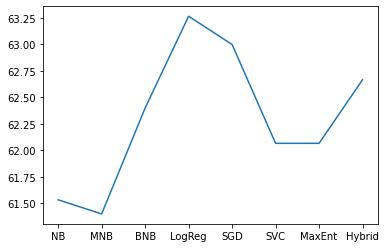

In [44]:
from matplotlib import pyplot as plt 
import numpy as np
  
# x-axis values 
x=[]
for i in accuracy:
    x.append(i[0])

# Y-axis values 
y = []
for i in accuracy:
    y.append(i[1])

# Function to plot 
plt.plot(y,x) 

  
# function to show the plot 
plt.show() 

Confusion matrix, without normalization
[[355 383]
 [177 585]]
Normalized confusion matrix
[[0.48 0.52]
 [0.23 0.77]]


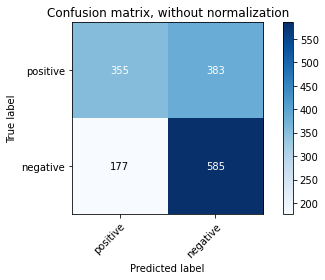

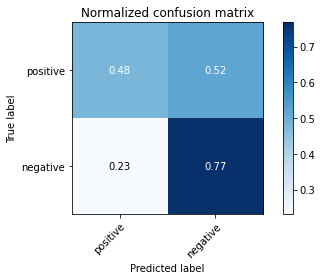

In [45]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels



class_names = [ 'positive','negative']



def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_test, preds, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, preds, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [46]:
def features(text):
    new_list=[]
    for i in text.split():
        if(i in adjectives):
            new_list.append(i)
    return new_list

In [47]:
def text_classify(text):
    cleaned_text=start(text)
    temp=features(cleaned_text)
    test_data=list_to_dict(temp)
    print(temp)
    print("Tweet given by user : ",text)
    for i in classifiers:
        print(i[1])
        determined_label=i[0].classify(test_data)
        print("This Tweet is ",determined_label)
        print("------------------------------")
    c=0
    print("Hybrid model")
    testset_data=[]
    testset_data.append([test_data,""])
    lab=hybrid(testset_data)
    print("This Tweet is ",lab[0])

In [48]:
from nltk.corpus import twitter_samples
import nltk
nltk.download('twitter_samples')
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
x=negative_tweets[:1000]
st=""
for i in x:
    st=st+" "+i
st

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


' hopeless for tmr :( Everything in the kids section of IKEA is so cute. Shame I\'m nearly 19 in 2 months :( @Hegelbon That heart sliding into the waste basket. :( “@ketchBurning: I hate Japanese call him "bani" :( :(”\n\nMe too Dang starting next week I have "work" :( oh god, my babies\' faces :( https://t.co/9fcwGvaki0 @RileyMcDonough make me smile :(( @f0ggstar @stuartthull work neighbour on motors. Asked why and he said hates the updates on search :( http://t.co/XvmTUikWln why?:("@tahuodyy: sialan:( https://t.co/Hv1i0xcrL2" Athabasca glacier was there in #1948 :-( #athabasca #glacier #jasper #jaspernationalpark #alberta #explorealberta #… http://t.co/dZZdqmf7Cz I have a really good m&amp;g idea but I\'m never going to meet them :((( @Rampageinthebox mare ivan :( @SophiaMascardo happy trip, keep safe. see you soon :* :( I\'m so tired hahahah :( @GrumpyCockney With knee replacements they get you up &amp; about the same day. :-(   Ouch. relate to the "sweet n\' sour" kind of "bi-polar

In [49]:
text_classify(st)

['sad', 'cute', 'nearly', 'sad', 'sad', 'sad', 'next', 'sad', 'sad', 'sad', 'sad', 'really', 'good', 'idea', 'never', 'sad', 'sad', 'happy', 'safe', 'soon', 'sad', 'tired', 'sad', 'sweet', 'sour', 'kind', 'full', 'sad', 'sad', 'sad', 'stupid', 'not', 'basic', 'digital', 'sad', 'good', 'sad', 'lonely', 'sad', 'really', 'sad', 'hard', 'long', 'sad', 'sad', 'far', 'sad', 'truly', 'sad', 'safe', 'sad', 'sad', 'sad', 'sad', 'late', 'sad', 'sick', 'first', 'sad', 'sad', 'back', 'old', 'weird', 'pale', 'massive', 'rash', 'sad', 'sad', 'not', 'care', 'sad', 'cute', 'love', 'sad', 'busy', 'sad', 'next', 'love', 'sad', 'frightening', 'really', 'sad', 'sad', 'active', 'love', 'sad', 'incomplete', 'sad', 'sad', 'not', 'sad', 'bad', 'bad', 'sad', 'sad', 'really', 'sad', 'powerful', 'sad', 'sad', 'mammoth', 'dirty', 'clean', 'not', 'easy', 'green', 'well', 'sad', 'sad', 'hungry', 'sane', 'sad', 'sad', 'sad', 'love', 'true', 'sad', 'sad', 'sad', 'tired', 'sad', 'sad', 'massive', 'actually', 'genuine'

In [50]:
#input from the user which will be used to classify 
def hinglish(input_text):
    translator = Translator(service_urls=['translate.google.co.in'])
    x=translator.translate(input_text,src="hi",dest="en")
    text_classify(x.text)

In [51]:
#input from the user which will be used to classify 
from textblob import TextBlob

def hinglish2(input_text):
    l=input_text.split()
    st=""
    for i in l:
        word=TextBlob(i)
        if(word.detect_language()=="hi"):
            translator = Translator(service_urls=['translate.google.com'])
            x=translator.translate(i,src="hi",dest="en")
            st=st+" "+x.text
        else:
            st=st+" "+i
    text_classify(st)

In [52]:
def func(input_text):
    l=input_text.split()
    flag=0
    for i in l:
        k=len(i)
        if(k<3):
            flag=1
            hinglish(input_text)
    if(not(flag)):
        hinglish2(input_text)
            

In [71]:
func("arrey waah! I'm very proud of you")

['proud']
Tweet given by user :  Arrey Waah!I'm Very Proud of You
naive bayes classifier
This Tweet is  positive
------------------------------
Multinomail naive bayes classifier
This Tweet is  positive
------------------------------
Bernouli classifier
This Tweet is  positive
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  positive
------------------------------
SGD classifier
This Tweet is  positive
------------------------------
SVC classifier
This Tweet is  positive
------------------------------
Max Entropy classifier
This Tweet is  positive
------------------------------
Hybrid model
This Tweet is  positive


In [72]:
func("tum log pagal ho")

['crazy']
Tweet given by user :  You guys are crazy
naive bayes classifier
This Tweet is  positive
------------------------------
Multinomail naive bayes classifier
This Tweet is  positive
------------------------------
Bernouli classifier
This Tweet is  positive
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  positive
------------------------------
SGD classifier
This Tweet is  positive
------------------------------
SVC classifier
This Tweet is  positive
------------------------------
Max Entropy classifier
This Tweet is  positive
------------------------------
Hybrid model
This Tweet is  positive


In [73]:
func("tum pagal ho")

['mad']
Tweet given by user :  you are mad
naive bayes classifier
This Tweet is  negative
------------------------------
Multinomail naive bayes classifier
This Tweet is  negative
------------------------------
Bernouli classifier
This Tweet is  negative
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  negative
------------------------------
SGD classifier
This Tweet is  positive
------------------------------
SVC classifier
This Tweet is  negative
------------------------------
Max Entropy classifier
This Tweet is  negative
------------------------------
Hybrid model
This Tweet is  negative


In [74]:
func("tum kharab ho")

['bad']
Tweet given by user :  You are bad
naive bayes classifier
This Tweet is  negative
------------------------------
Multinomail naive bayes classifier
This Tweet is  negative
------------------------------
Bernouli classifier
This Tweet is  negative
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  negative
------------------------------
SGD classifier
This Tweet is  negative
------------------------------
SVC classifier
This Tweet is  negative
------------------------------
Max Entropy classifier
This Tweet is  negative
------------------------------
Hybrid model
This Tweet is  negative


In [75]:
func("aap achha kaam kar rhe ho")

['good']
Tweet given by user :  You are doing good work
naive bayes classifier
This Tweet is  positive
------------------------------
Multinomail naive bayes classifier
This Tweet is  positive
------------------------------
Bernouli classifier
This Tweet is  positive
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  positive
------------------------------
SGD classifier
This Tweet is  positive
------------------------------
SVC classifier
This Tweet is  positive
------------------------------
Max Entropy classifier
This Tweet is  positive
------------------------------
Hybrid model
This Tweet is  positive


In [76]:
func("tum kaam accha kar rhe ho")

['good']
Tweet given by user :  You are doing good work
naive bayes classifier
This Tweet is  positive
------------------------------
Multinomail naive bayes classifier
This Tweet is  positive
------------------------------
Bernouli classifier
This Tweet is  positive
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  positive
------------------------------
SGD classifier
This Tweet is  positive
------------------------------
SVC classifier
This Tweet is  positive
------------------------------
Max Entropy classifier
This Tweet is  positive
------------------------------
Hybrid model
This Tweet is  positive
